In [1]:
import pandas as pd

# Load sample datasets
audit_data = pd.read_csv("data/audit_data.csv")
inventory_data = pd.read_csv("data/inventory_data.csv")

# Clean missing values
audit_data.dropna(inplace=True)
inventory_data.fillna(0, inplace=True)

# Merge datasets for consolidated analysis
merged_data = pd.merge(audit_data, inventory_data, on="Contractor_ID", how="inner")

# Add a compliance metric column
merged_data['Compliance_Score'] = (1 - (merged_data['Audit_Issues'] / merged_data['Total_Assets'])) * 100

# export merged_data DataFrame to CSV
merged_data.to_csv('data/merged_government_property_compliance_data.csv', index=False)


In [2]:
# Show audit data
audit_data

,Date,Contractor_ID,Audit_Issues,Audit_Passed
0,2020-03-31,Contractor_1,14,No
1,2020-03-31,Contractor_2,0,Yes
2,2020-03-31,Contractor_3,10,No
3,2020-03-31,Contractor_4,4,Yes
4,2020-03-31,Contractor_5,9,No
...,...,...,...,...
155,2023-12-31,Contractor_6,1,Yes
156,2023-12-31,Contractor_7,11,No
157,2023-12-31,Contractor_8,9,No
158,2023-12-31,Contractor_9,12,No


In [3]:
# Show inventory data
inventory_data

,Contractor_ID,Total_Assets,Lost_Assets,Damaged_Assets,Inventory_Accuracy (%)
0,Contractor_1,7524,325,0,95.68
1,Contractor_2,2523,89,45,94.69
2,Contractor_3,4593,176,77,94.49
3,Contractor_4,3753,44,26,98.13
4,Contractor_5,4296,46,120,96.14
5,Contractor_6,4261,55,93,96.53
6,Contractor_7,6202,47,60,98.27
7,Contractor_8,6432,25,35,99.07
8,Contractor_9,7376,7,112,98.39
9,Contractor_10,7986,252,179,94.60


In [4]:
# Show merged data
merged_data

,Date,Contractor_ID,Audit_Issues,Audit_Passed,Total_Assets,Lost_Assets,Damaged_Assets,Inventory_Accuracy (%),Compliance_Score
0,2020-03-31,Contractor_1,14,No,7524,325,0,95.68,99.813929
1,2020-06-30,Contractor_1,0,Yes,7524,325,0,95.68,100.000000
2,2020-09-30,Contractor_1,5,No,7524,325,0,95.68,99.933546
3,2020-12-31,Contractor_1,4,Yes,7524,325,0,95.68,99.946837
4,2021-03-31,Contractor_1,13,No,7524,325,0,95.68,99.827220
...,...,...,...,...,...,...,...,...,...
155,2022-12-31,Contractor_10,7,No,7986,252,179,94.60,99.912347
156,2023-03-31,Contractor_10,10,No,7986,252,179,94.60,99.874781
157,2023-06-30,Contractor_10,3,Yes,7986,252,179,94.60,99.962434
158,2023-09-30,Contractor_10,12,No,7986,252,179,94.60,99.849737


### 1. Compliance Score Trend
Purpose: Monitor Contractor Performance Over Time

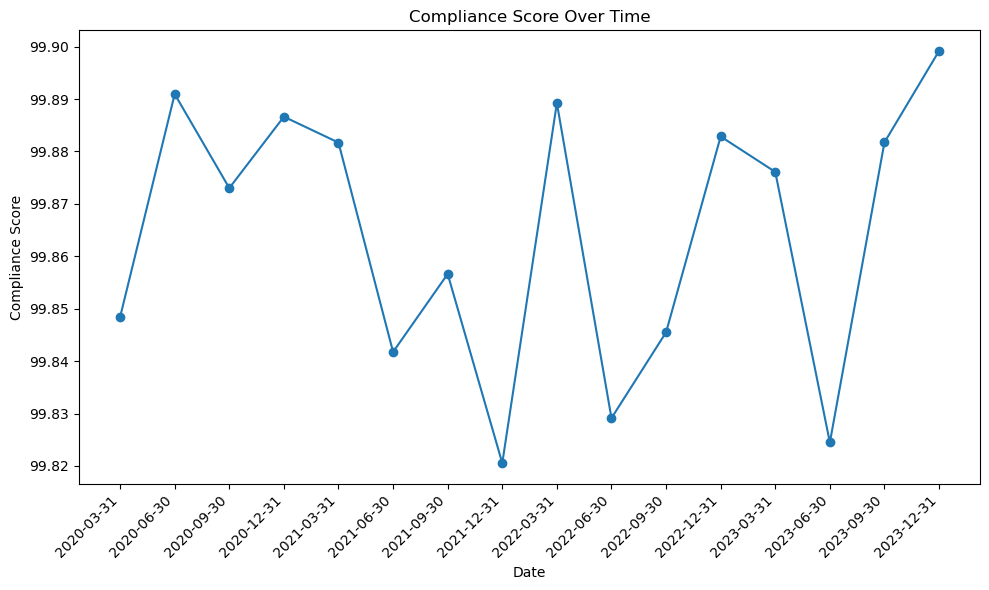

In [5]:
# Compliance score trend
import matplotlib.pyplot as plt

# Compliance score trend
compliance_trend = merged_data.groupby('Date')['Compliance_Score'].mean()

# Plot with x-axis formatting
plt.figure(figsize=(10, 6))
plt.plot(compliance_trend, marker='o')
plt.title('Compliance Score Over Time')
plt.xlabel('Date')
plt.ylabel('Compliance Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


### 2. Audit Issues Over Time
Purpose: Identify trends in audit issues across quarters.

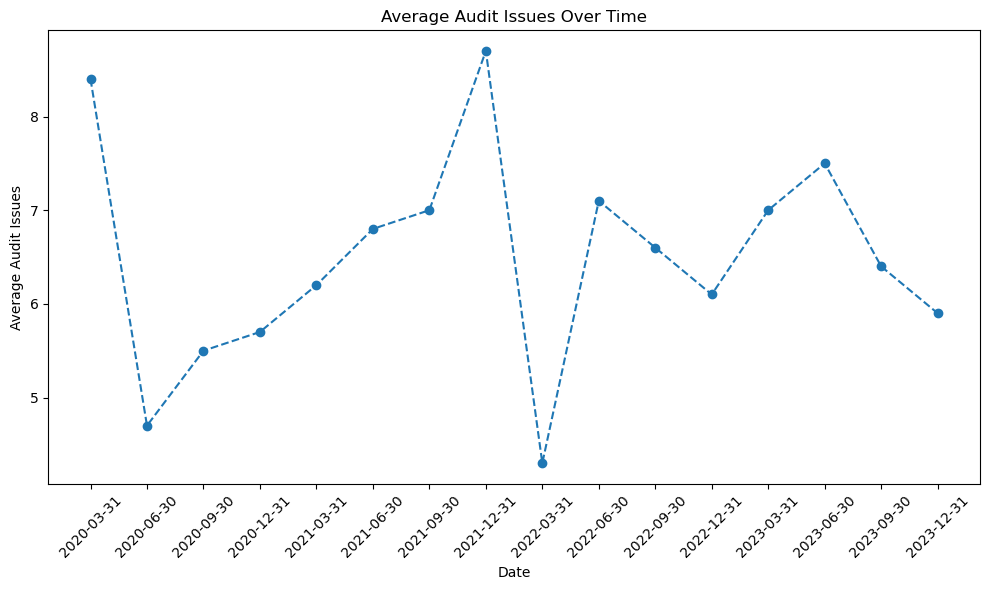

In [6]:
# Audit Issues Over Time
audit_trend = merged_data.groupby('Date')['Audit_Issues'].mean()

plt.figure(figsize=(10, 6))
plt.plot(audit_trend, marker='o', linestyle='--')
plt.title('Average Audit Issues Over Time')
plt.xlabel('Date')
plt.ylabel('Average Audit Issues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Top Contractors by Compliance Score
Purpose: Identify the contractors with the best and worst compliance scores.

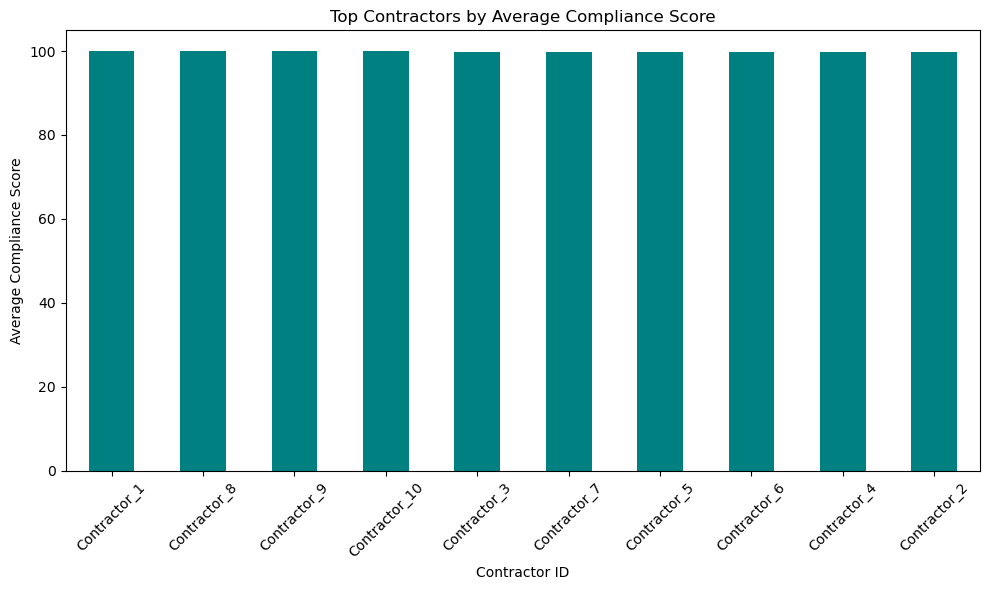

In [7]:
# Top Contractors by Compliance Score
top_contractors = merged_data.groupby('Contractor_ID')['Compliance_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
top_contractors.plot(kind='bar', color='teal')
plt.title('Top Contractors by Average Compliance Score')
plt.xlabel('Contractor ID')
plt.ylabel('Average Compliance Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 4. Heatmap of Contractor Performance
Purpose: Compare contractors across metrics such as Audit_Issues, Lost_Assets, and Compliance_Score.

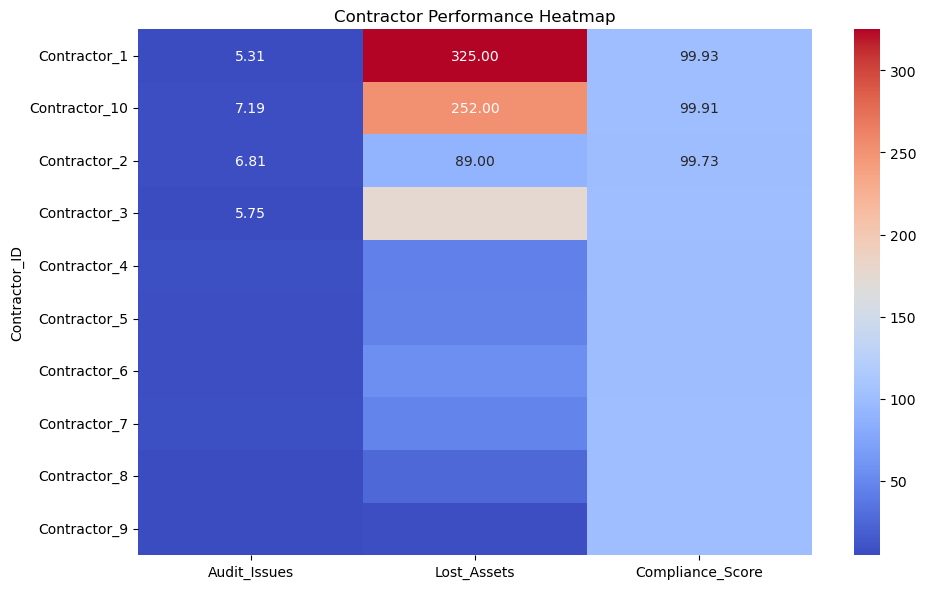

In [8]:
import seaborn as sns

# Heatmap of Contractor Performance
performance_metrics = merged_data.groupby('Contractor_ID')[['Audit_Issues', 'Lost_Assets', 'Compliance_Score']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(performance_metrics, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Contractor Performance Heatmap')
plt.tight_layout()
plt.show()

### 5. Damaged vs. Lost Assets per Contractor
Purpose: Compare the number of damaged and lost assets for each contractor.

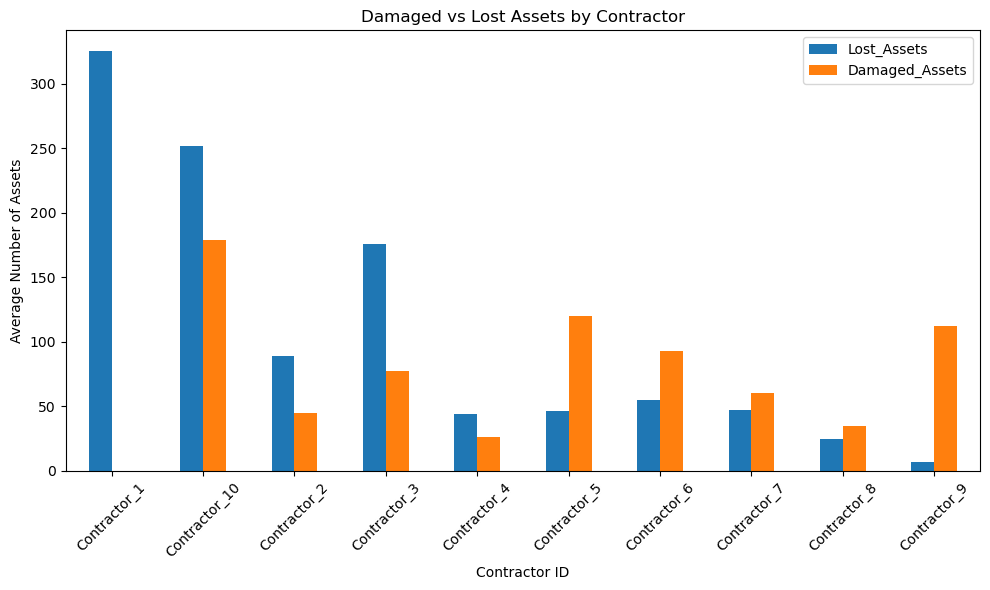

In [9]:
# Damaged vs Lost Assets
damaged_lost_assets = merged_data.groupby('Contractor_ID')[['Lost_Assets', 'Damaged_Assets']].mean()

damaged_lost_assets.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Damaged vs Lost Assets by Contractor')
plt.xlabel('Contractor ID')
plt.ylabel('Average Number of Assets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Compliance Scores Across Time per Contractor
Purpose: Track compliance scores for individual contractors over time.

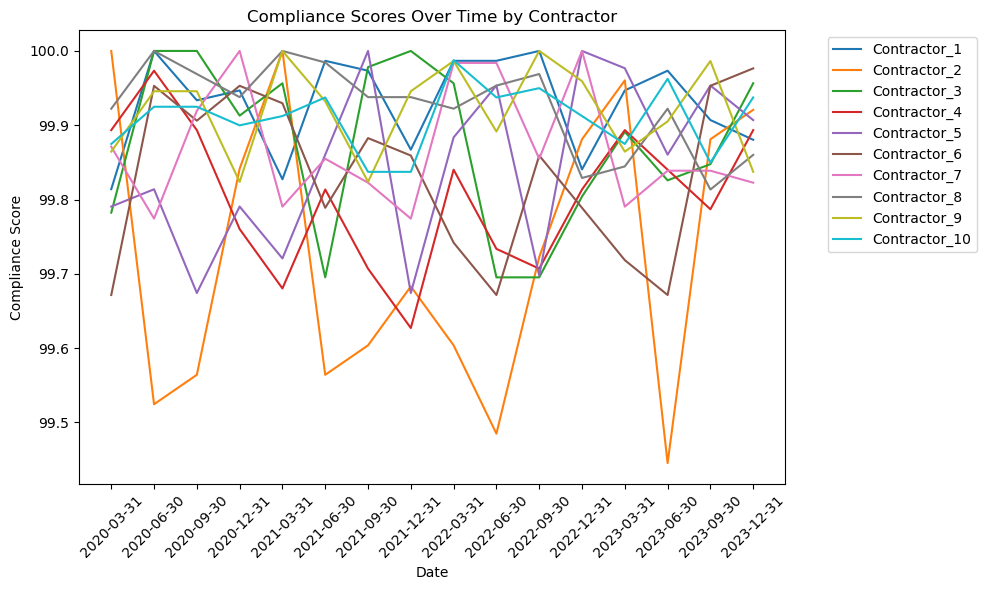

In [10]:
# Compliance Score Per Contractor
plt.figure(figsize=(10, 6))
for contractor in merged_data['Contractor_ID'].unique():
    subset = merged_data[merged_data['Contractor_ID'] == contractor]
    plt.plot(subset['Date'], subset['Compliance_Score'], label=contractor)

plt.title('Compliance Scores Over Time by Contractor')
plt.xlabel('Date')
plt.ylabel('Compliance Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()